In [1]:
import numpy as np
import pandas as pd

# Statsmodel Library

In [2]:
df = pd.read_csv('./data/macrodata.csv', index_col=0, parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<AxesSubplot:>

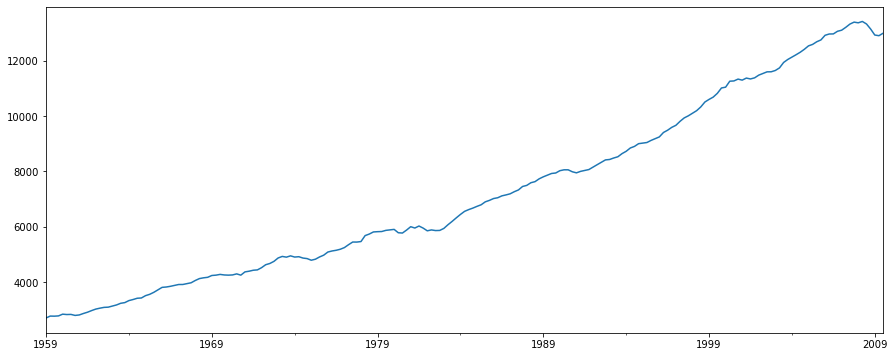

In [3]:
df['realgdp'].plot(figsize=(15,6))

In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [5]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [6]:
type(gdp_trend)

pandas.core.series.Series

<AxesSubplot:>

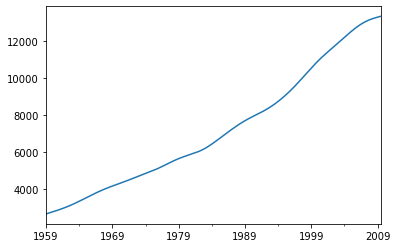

In [7]:
gdp_trend.plot()

In [8]:
df['trend'] = gdp_trend

<AxesSubplot:>

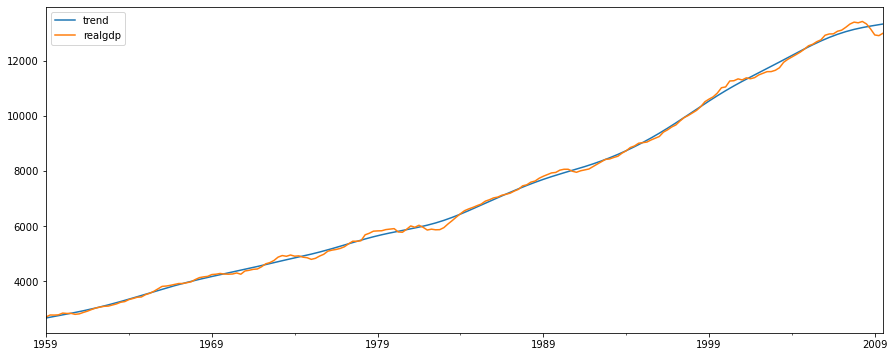

In [9]:
df[['trend', 'realgdp']].plot(figsize=(15,6))

<AxesSubplot:>

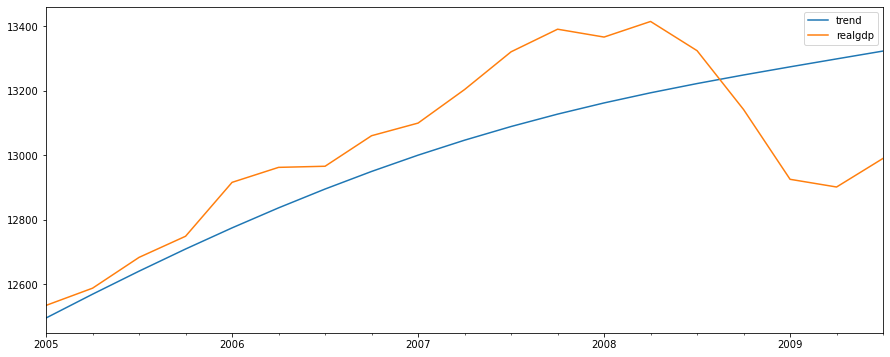

In [10]:
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize=(15,6))

# ETS Decomposition (Error, Trend and Seasonality)

In [11]:
import pandas as pd
import numpy as np
file = './data/airline_passengers.csv'
airline = pd.read_csv(file, index_col='Month', parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

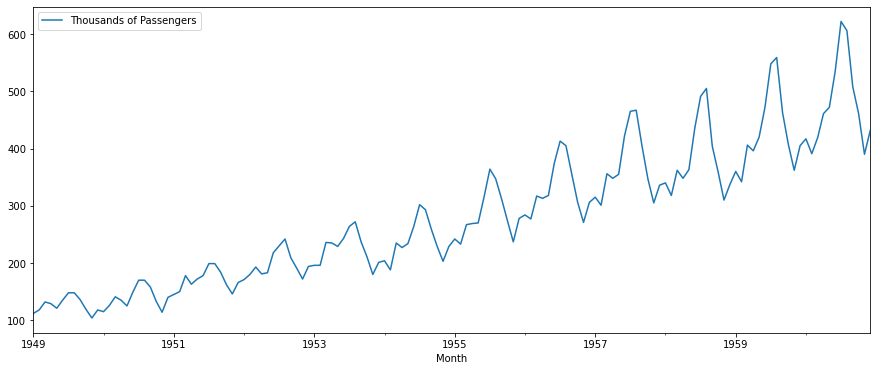

In [12]:
airline.plot(figsize=(15,6))

In [13]:
# We can't have missing data for ETS decomposition
airline.dropna(inplace=True)

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

<AxesSubplot:xlabel='Month'>

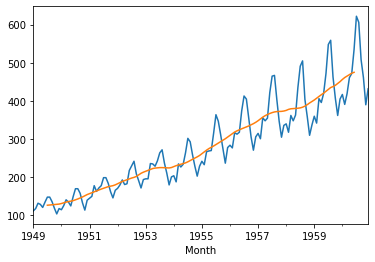

In [16]:
result.observed.plot()
result.trend.plot()

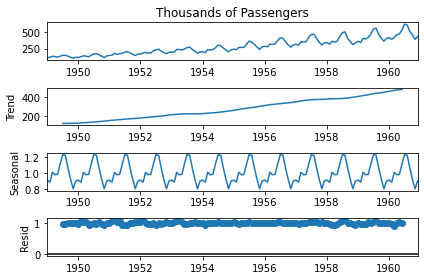

In [17]:
result.plot();

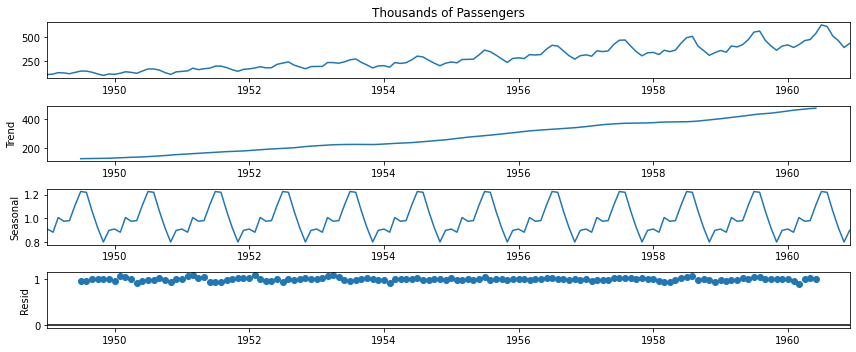

In [18]:
# The plot function over a result has no figsize argument, we have to do it another way
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot();

# EMWA (Exponential Weigthed Moving Averages)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = './data/airline_passengers.csv'
airline = pd.read_csv(file, index_col='Month')
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [20]:
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
airline['6 month SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12 month SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline

,Thousands of Passengers,6 month SMA,12 month SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333


<AxesSubplot:xlabel='Month'>

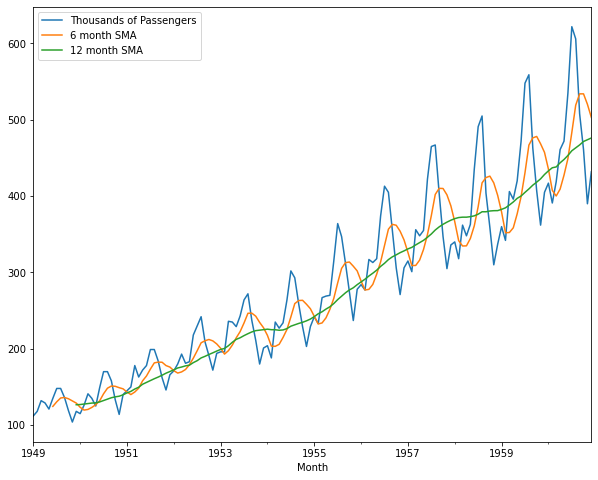

In [22]:
airline.plot(figsize=(10,8))

In [23]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

<AxesSubplot:xlabel='Month'>

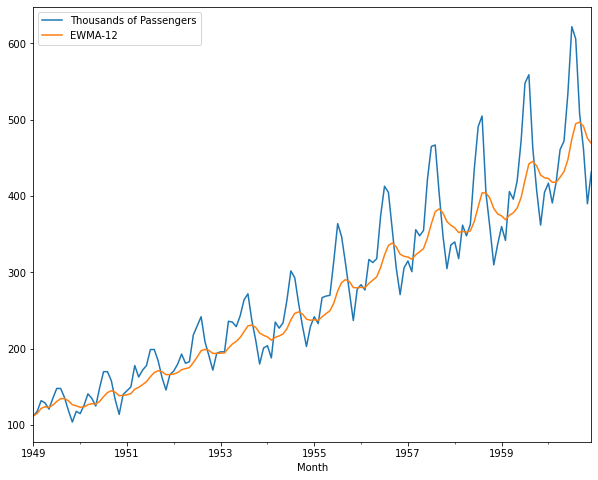

In [24]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10,8))

# Holt Winters

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = './data/airline_passengers.csv'
airline = pd.read_csv(file, index_col='Month', parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
